In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/prime.csv")


In [2]:
# Display the first few rows of the dataset
data.head()

# Get basic information about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [3]:
# Handling missing values
data.dropna(subset=['director', 'cast'], inplace=True)
data.dropna(subset=['date_added'], inplace=True)

# Handling duplicates
data.drop_duplicates(inplace=True)



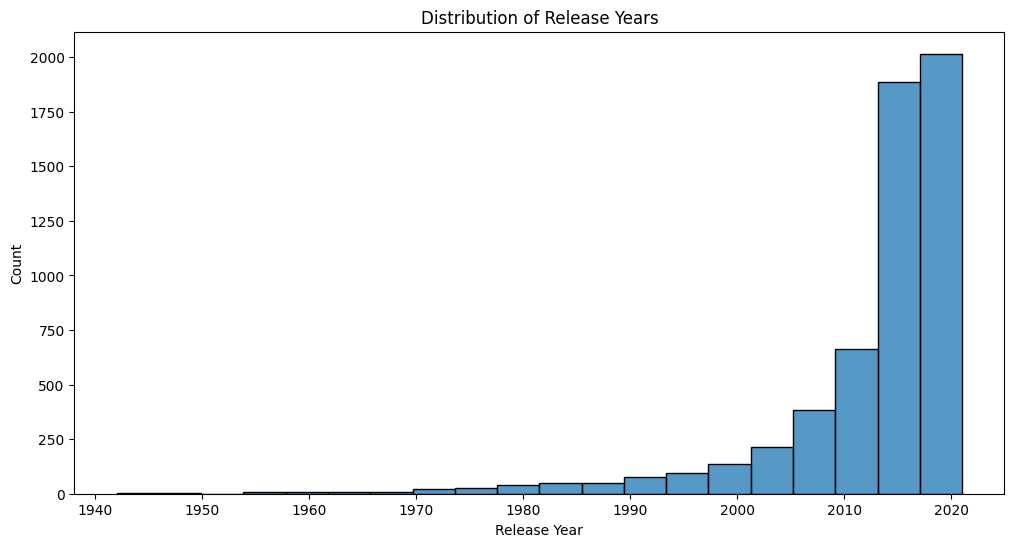

The year 2018 had the highest number of content additions with 691 additions.
The year 1942 had the lowest number of content additions with 1 additions.
The average number of content additions per year is approximately 79.17.


In [14]:
# Calculate the distribution of content by release year
yearly_counts = data['release_year'].value_counts().sort_index()

# Find the year with the most content additions
max_year = yearly_counts.idxmax()
max_count = yearly_counts.max()

# Find the year with the fewest content additions
min_year = yearly_counts.idxmin()
min_count = yearly_counts.min()

# Calculate the average number of content additions per year
average_additions_per_year = yearly_counts.mean()

# Visualize the insights
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=20)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Display insights
print(f"The year {max_year} had the highest number of content additions with {max_count} additions.")
print(f"The year {min_year} had the lowest number of content additions with {min_count} additions.")
print(f"The average number of content additions per year is approximately {average_additions_per_year:.2f}.")


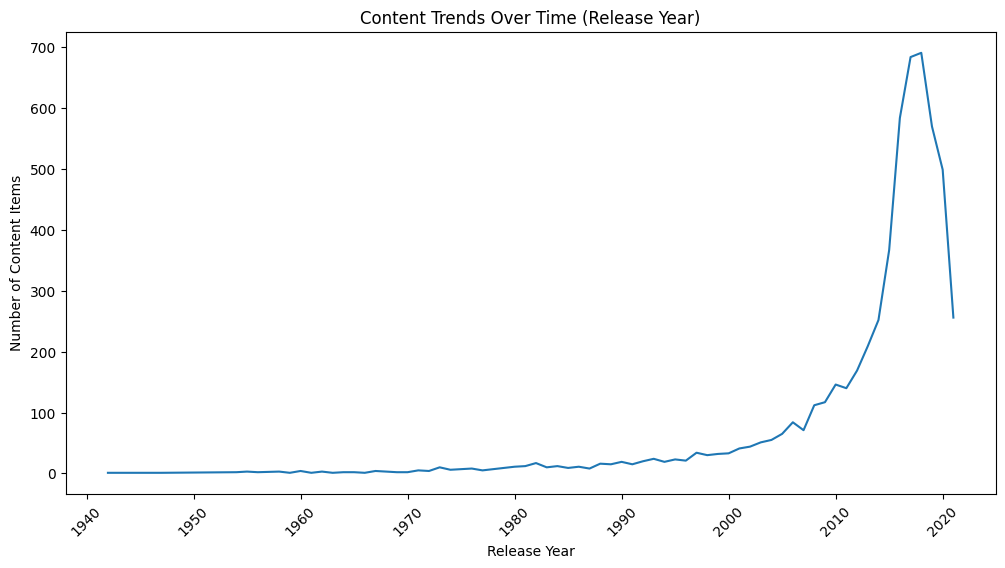

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of content items by release year
yearly_counts = data['release_year'].value_counts().sort_index()

# Create a line plot to visualize content trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Content Trends Over Time (Release Year)')
plt.xlabel('Release Year')
plt.ylabel('Number of Content Items')
plt.xticks(rotation=45)
plt.show()


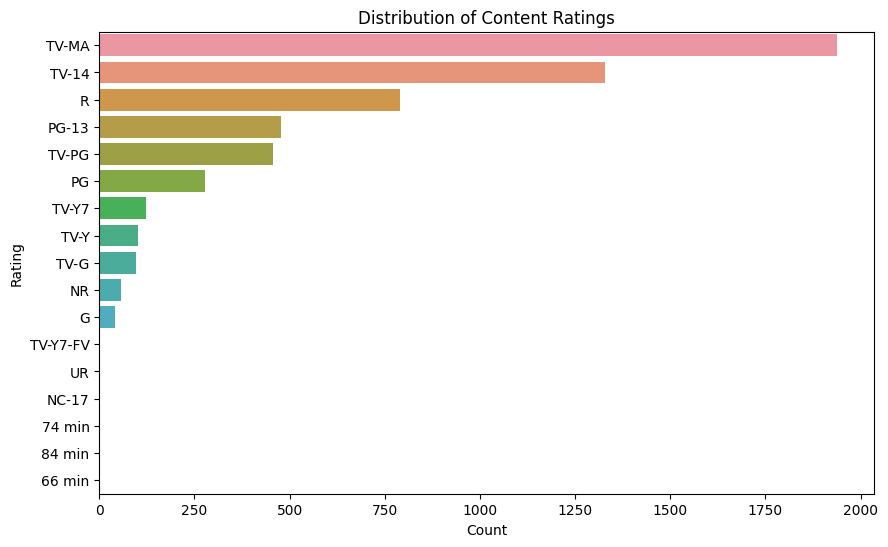

In [6]:
# Create a bar plot to visualize the distribution of content ratings
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


In [10]:
# Convert ratings to numerical values for correlation analysis (you need to define the mapping)
rating_mapping = {"G": 1, "PG": 2, "PG-13": 3, "R": 4}
data['rating_numeric'] = data['rating'].map(rating_mapping)

# Calculate the correlation between release year and rating
correlation = data['release_year'].corr(data['rating_numeric'])
print(f"Correlation between Release Year and Rating: {correlation:.2f}")


Correlation between Release Year and Rating: 0.15


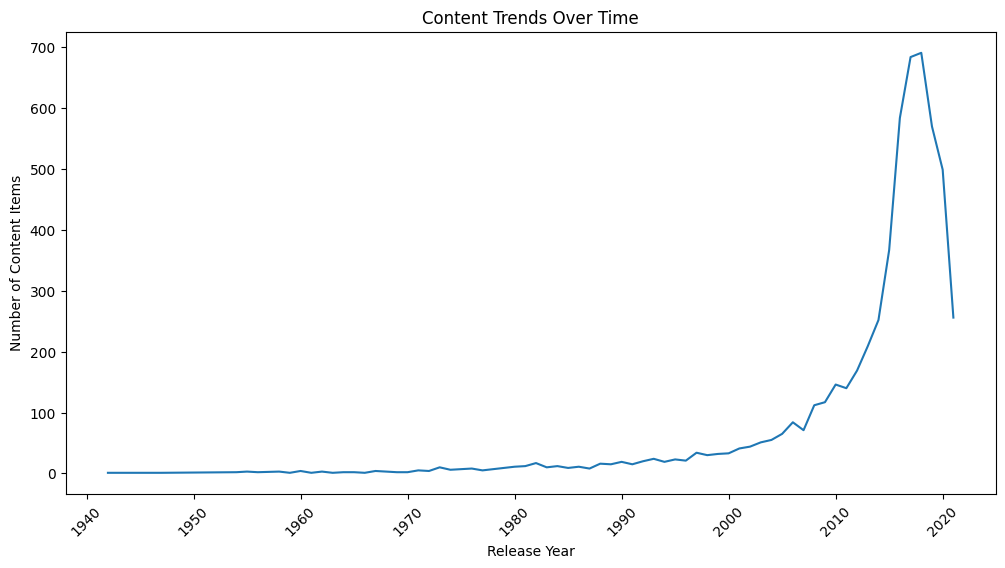

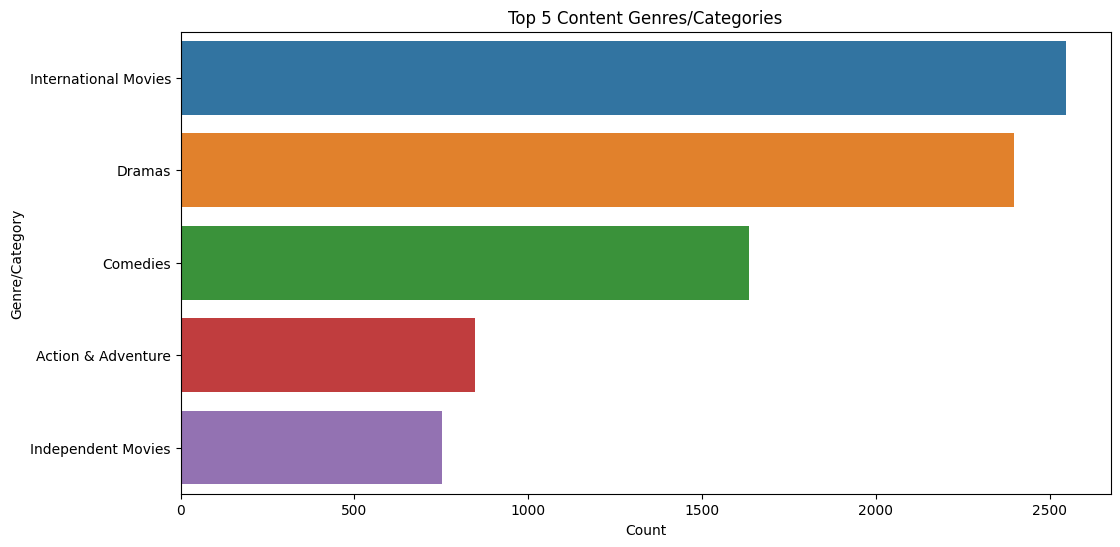

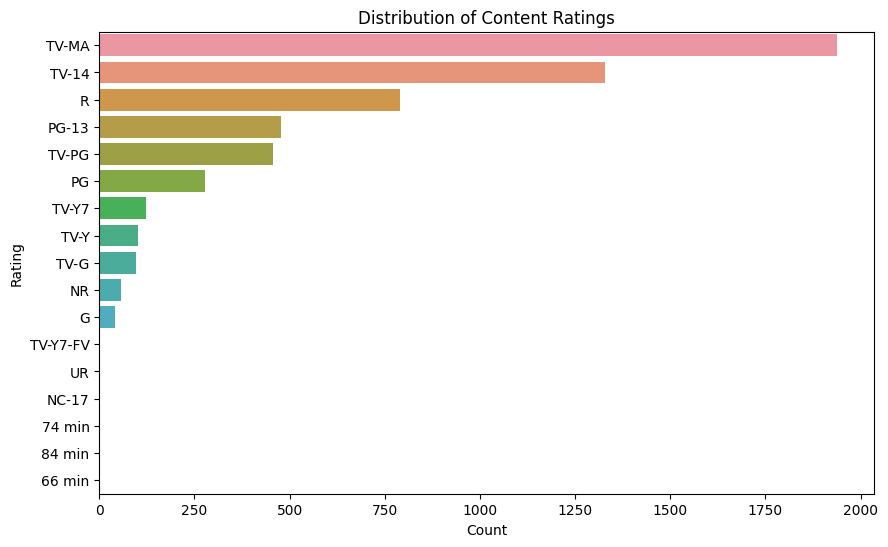

Key Insights and Findings:
1. The year 2018 had the highest number of content additions.
2. The year 1942 had the lowest number of content additions.
3. The top 5 content genres/categories are: International Movies, Dramas, Comedies, Action & Adventure, Independent Movies.
4. The most common content rating is 'TV-MA'.


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("prime.csv")

# Data Cleaning (if not already done)
data.dropna(subset=['director', 'cast', 'date_added'], inplace=True)
data.drop_duplicates(inplace=True)

# Content Trends Over Time
yearly_counts = data['release_year'].value_counts().sort_index()

# Content by Genre/Category
genre_counts = data['listed_in'].str.split(', ', expand=True).stack().value_counts()

# Ratings Distribution
rating_counts = data['rating'].value_counts()

# Data Insights
# 1. Content Trends Over Time
# Find the years with the highest and lowest number of content additions.
max_year = yearly_counts.idxmax()
min_year = yearly_counts.idxmin()

# 2. Content by Genre/Category
# Identify the most popular genres/categories.
top_genres = genre_counts.head(5)

# 3. Ratings Distribution
# Find the most common content ratings.
most_common_rating = rating_counts.idxmax()

# Visualize Insights
# 1. Content Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Content Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Content Items')
plt.xticks(rotation=45)
plt.show()

# 2. Content by Genre/Category
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 5 Content Genres/Categories')
plt.xlabel('Count')
plt.ylabel('Genre/Category')
plt.show()

# 3. Ratings Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

# Display Key Insights
print("Key Insights and Findings:")
print(f"1. The year {max_year} had the highest number of content additions.")
print(f"2. The year {min_year} had the lowest number of content additions.")
print(f"3. The top 5 content genres/categories are: {', '.join(top_genres.index)}.")
print(f"4. The most common content rating is '{most_common_rating}'.")

# You can add more insights based on your specific analysis goals.
